<a href="https://colab.research.google.com/github/paulorsf29/Implementa-o_IA_Evolutiva/blob/main/Implementa%C3%A7%C3%A3o_IA_Evolutiva_em_Mapa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EXECUTANDO ANALISE EVOLUTIVA COM VISUALIZACAO DE ROTAS

Processando instância com 6 cidades...
   ACO Finalizado: 267.14 km | Tempo: 0.28s
   Artigo GLPK: 344.9 km
   Artigo ACO: 344.9 km

Processando instância com 7 cidades...
   ACO Finalizado: 378.25 km | Tempo: 0.35s
   Artigo GLPK: 438.3 km
   Artigo ACO: 438.3 km

Processando instância com 12 cidades...
   ACO Finalizado: 598.01 km | Tempo: 1.15s
   Artigo GLPK: 672.7 km
   Artigo ACO: 672.7 km

Processando instância com 24 cidades...
   ACO Finalizado: 1030.06 km | Tempo: 8.54s
   Artigo GLPK: 1339.9 km
   Artigo ACO: 1327.8 km

Processando instância com 36 cidades...
   ACO Finalizado: 1230.07 km | Tempo: 18.77s
   Artigo GLPK: 1719.2 km
   Artigo ACO: 1705.1 km

Processando instância com 48 cidades...
   ACO Finalizado: 1500.94 km | Tempo: 36.44s
   Artigo GLPK: 1942.3 km
   Artigo ACO: 1953.4 km

--- ANALISE COMPARATIVA DETALHADA ---


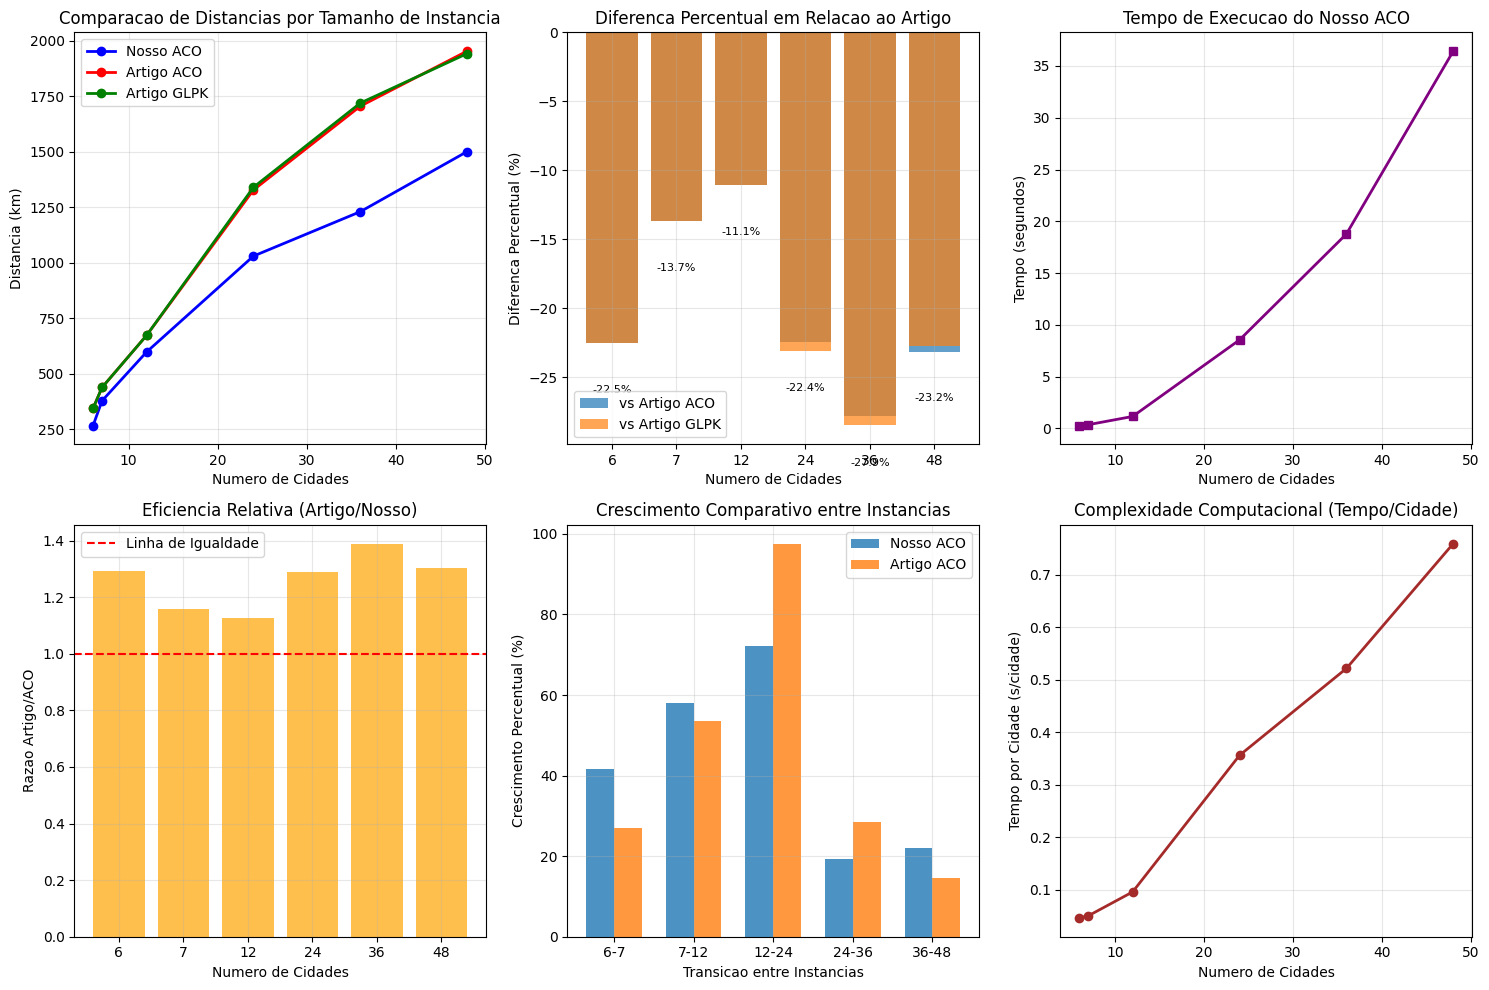


--- TABELA COMPARATIVA DETALHADA ---
N Cidades  Nosso ACO    Artigo ACO   Artigo GLPK  Diff ACO (%) Diff GLPK (%) Tempo (s) 
----------------------------------------------------------------------------------------------------
6          267.14       344.90       344.90       -22.55       -22.55       0.28      
7          378.25       438.30       438.30       -13.70       -13.70       0.35      
12         598.01       672.70       672.70       -11.10       -11.10       1.15      
24         1030.06      1327.80      1339.90      -22.42       -23.12       8.54      
36         1230.07      1705.10      1719.20      -27.86       -28.45       18.77     
48         1500.94      1953.40      1942.30      -23.16       -22.72       36.44     

--- VISUALIZACAO DETALHADA DAS ROTAS ENCONTRADAS ---

ROTA PARA 6 CIDADES (Custo: 267.14 km):
SEQUENCIA COMPLETA:
   1. [3] Itajá
   2. [4] Assú
   3. [6] Mossoró
   4. [5] Jucurutu
   5. [2] São Rafael
   6. [1] Angicos

DETALHAMENTO DOS TRECHOS:
  

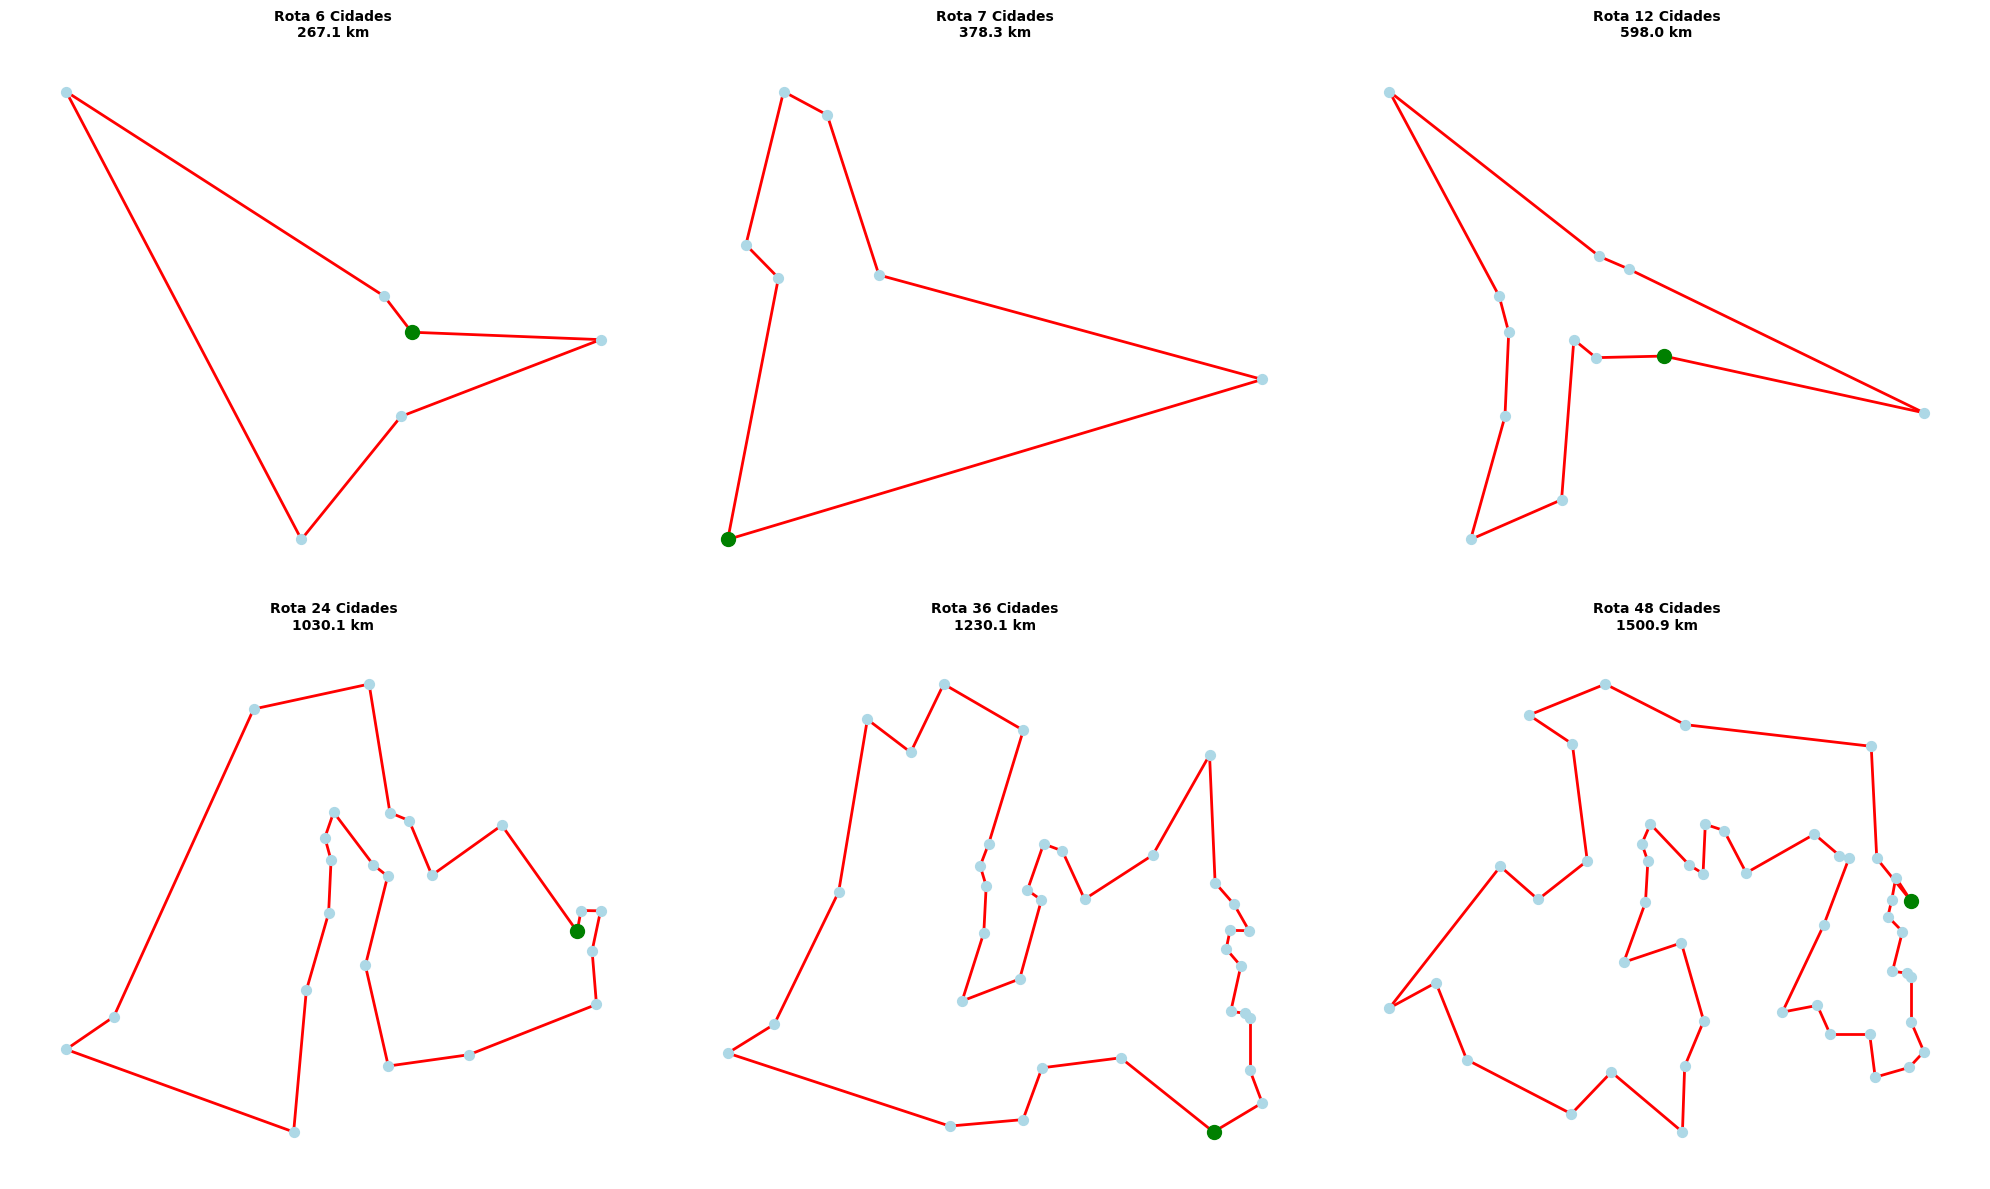


--- RESUMO FINAL DA ANALISE ---
Media das diferencas absolutas vs Artigo ACO: 20.13%
Media das diferencas absolutas vs Artigo GLPK: 20.27%
STATUS: Atencao - Ha diferencas significativas que devem ser analisadas

Performance computacional:
- Tempo medio por instancia: 10.92 segundos
- Instancia mais rapida: 0.28 segundos (6 cidades)
- Instancia mais lenta: 36.44 segundos (48 cidades)


In [7]:
# @title Codigo Completo com Visualizacao de Rotas - Algoritmo de Colonia de Formigas
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.patches as mpatches
import math
import time

# [MANTENHA TODAS AS FUNÇÕES ANTERIORES...]

# MODIFIQUE A PARTE FINAL DO CÓDIGO:

print("EXECUTANDO ANALISE EVOLUTIVA COM VISUALIZACAO DE ROTAS")
print("=" * 60)

# Executar ACO para cada instância
resultados_nosso_aco = {}
tempos_execucao = {}
melhores_rotas = {}  # Guardar as rotas encontradas

for n_cidades, indices in instancias.items():
    print(f"\nProcessando instância com {n_cidades} cidades...")

    # Criar submatriz de distâncias
    distancias_instancia = distancias_base[np.ix_(indices, indices)]

    # Selecionar parâmetros
    params = parametros_pequenos if n_cidades <= 12 else parametros_grandes
    n_iteracoes = 200 if n_cidades <= 12 else 300
    n_formigas = n_cidades

    inicio = time.time()
    aco = AntColonyOptimizer(distancias_instancia, n_formigas, n_iteracoes,
                           params['alpha'], params['beta'], params['rho'],
                           params['Q'], 0.1)
    rota, custo, historico = aco.rodar()
    tempo = time.time() - inicio

    resultados_nosso_aco[n_cidades] = custo
    tempos_execucao[n_cidades] = tempo
    melhores_rotas[n_cidades] = rota  # Guarda a rota

    print(f"   ACO Finalizado: {custo:.2f} km | Tempo: {tempo:.2f}s")
    print(f"   Artigo GLPK: {resultados_artigo[n_cidades]} km")
    print(f"   Artigo ACO: {resultados_artigo_aco[n_cidades]} km")

# ANÁLISE COMPARATIVA EXPANDIDA
print(f"\n--- ANALISE COMPARATIVA DETALHADA ---")

# Gráfico 1: Comparação de Resultados
plt.figure(figsize=(15, 10))

# Subplot 1: Comparação de distâncias
plt.subplot(2, 3, 1)
tamanhos = sorted(instancias.keys())
valores_nosso = [resultados_nosso_aco[n] for n in tamanhos]
valores_artigo_aco = [resultados_artigo_aco[n] for n in tamanhos]
valores_artigo_glpk = [resultados_artigo[n] for n in tamanhos]

plt.plot(tamanhos, valores_nosso, 'bo-', linewidth=2, markersize=6, label='Nosso ACO')
plt.plot(tamanhos, valores_artigo_aco, 'ro-', linewidth=2, markersize=6, label='Artigo ACO')
plt.plot(tamanhos, valores_artigo_glpk, 'go-', linewidth=2, markersize=6, label='Artigo GLPK')

plt.xlabel('Numero de Cidades')
plt.ylabel('Distancia (km)')
plt.title('Comparacao de Distancias por Tamanho de Instancia')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 2: Diferenças percentuais
plt.subplot(2, 3, 2)
diferencas_aco = [((valores_nosso[i] - valores_artigo_aco[i]) / valores_artigo_aco[i]) * 100 for i in range(len(tamanhos))]
diferencas_glpk = [((valores_nosso[i] - valores_artigo_glpk[i]) / valores_artigo_glpk[i]) * 100 for i in range(len(tamanhos))]

bars1 = plt.bar([str(n) for n in tamanhos], diferencas_aco, alpha=0.7, label='vs Artigo ACO')
bars2 = plt.bar([str(n) for n in tamanhos], diferencas_glpk, alpha=0.7, label='vs Artigo GLPK')

plt.xlabel('Numero de Cidades')
plt.ylabel('Diferenca Percentual (%)')
plt.title('Diferenca Percentual em Relacao ao Artigo')
plt.legend()
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.grid(True, alpha=0.3)

# Adicionar valores nas barras
for bar, valor in zip(bars1, diferencas_aco):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + (1 if valor >=0 else -3),
             f'{valor:.1f}%', ha='center', va='bottom' if valor >=0 else 'top', fontsize=8)

# Subplot 3: Tempos de execução
plt.subplot(2, 3, 3)
tempos = [tempos_execucao[n] for n in tamanhos]
plt.plot(tamanhos, tempos, 'purple', linewidth=2, marker='s', markersize=6)
plt.xlabel('Numero de Cidades')
plt.ylabel('Tempo (segundos)')
plt.title('Tempo de Execucao do Nosso ACO')
plt.grid(True, alpha=0.3)

# Subplot 4: Eficiência relativa
plt.subplot(2, 3, 4)
eficiencia = [valores_artigo_aco[i] / valores_nosso[i] for i in range(len(tamanhos))]
plt.bar([str(n) for n in tamanhos], eficiencia, color='orange', alpha=0.7)
plt.xlabel('Numero de Cidades')
plt.ylabel('Razao Artigo/ACO')
plt.title('Eficiencia Relativa (Artigo/Nosso)')
plt.axhline(y=1, color='red', linestyle='--', label='Linha de Igualdade')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 5: Crescimento comparativo
plt.subplot(2, 3, 5)
crescimento_nosso = []
crescimento_artigo = []
for i in range(1, len(tamanhos)):
    crescimento_nosso.append(((valores_nosso[i] - valores_nosso[i-1]) / valores_nosso[i-1]) * 100)
    crescimento_artigo.append(((valores_artigo_aco[i] - valores_artigo_aco[i-1]) / valores_artigo_aco[i-1]) * 100)

transicoes = [f'{tamanhos[i-1]}-{tamanhos[i]}' for i in range(1, len(tamanhos))]
x_pos = np.arange(len(transicoes))
largura = 0.35

plt.bar(x_pos - largura/2, crescimento_nosso, largura, label='Nosso ACO', alpha=0.8)
plt.bar(x_pos + largura/2, crescimento_artigo, largura, label='Artigo ACO', alpha=0.8)

plt.xlabel('Transicao entre Instancias')
plt.ylabel('Crescimento Percentual (%)')
plt.title('Crescimento Comparativo entre Instancias')
plt.xticks(x_pos, transicoes)
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 6: Performance por tamanho
plt.subplot(2, 3, 6)
performance = [tempos_execucao[n] / n for n in tamanhos]  # Tempo por cidade
plt.plot(tamanhos, performance, 'brown', linewidth=2, marker='o', markersize=6)
plt.xlabel('Numero de Cidades')
plt.ylabel('Tempo por Cidade (s/cidade)')
plt.title('Complexidade Computacional (Tempo/Cidade)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# TABELA COMPARATIVA DETALHADA
print(f"\n--- TABELA COMPARATIVA DETALHADA ---")
print("=" * 100)
print(f"{'N Cidades':<10} {'Nosso ACO':<12} {'Artigo ACO':<12} {'Artigo GLPK':<12} {'Diff ACO (%)':<12} {'Diff GLPK (%)':<12} {'Tempo (s)':<10}")
print("-" * 100)

for n in tamanhos:
    nosso = resultados_nosso_aco[n]
    artigo_aco = resultados_artigo_aco[n]
    artigo_glpk = resultados_artigo[n]
    diff_aco = ((nosso - artigo_aco) / artigo_aco) * 100
    diff_glpk = ((nosso - artigo_glpk) / artigo_glpk) * 100
    tempo = tempos_execucao[n]

    print(f"{n:<10} {nosso:<12.2f} {artigo_aco:<12.2f} {artigo_glpk:<12.2f} {diff_aco:<12.2f} {diff_glpk:<12.2f} {tempo:<10.2f}")

# VISUALIZACAO DETALHADA DAS ROTAS
print(f"\n--- VISUALIZACAO DETALHADA DAS ROTAS ENCONTRADAS ---")

for n_cidades in [6, 12, 48]:  # Mostrar para 3 tamanhos diferentes
    print(f"\nROTA PARA {n_cidades} CIDADES (Custo: {resultados_nosso_aco[n_cidades]:.2f} km):")

    indices = instancias[n_cidades]
    rota = melhores_rotas[n_cidades]

    print("SEQUENCIA COMPLETA:")
    for i, cidade_idx in enumerate(rota[:-1]):  # Exclui repetição final
        nome_original = nomes_cidades[indices[cidade_idx]]
        partes = nome_original.split('.', 1)
        numero = partes[0]
        nome = partes[1].strip() if len(partes) > 1 else nome_original
        print(f"  {i+1:2d}. [{numero}] {nome}")

    # Calcular distância entre cada par de cidades
    print(f"\nDETALHAMENTO DOS TRECHOS:")
    distancia_total = 0
    for i in range(len(rota) - 1):
        cidade_atual_idx = rota[i]
        cidade_prox_idx = rota[i + 1]

        nome_atual = nomes_cidades[indices[cidade_atual_idx]]
        nome_prox = nomes_cidades[indices[cidade_prox_idx]]

        distancia_trecho = distancias_base[
            indices[cidade_atual_idx],
            indices[cidade_prox_idx]
        ]
        distancia_total += distancia_trecho

        nome_atual_formatado = nome_atual.split('.', 1)[1].strip() if '.' in nome_atual else nome_atual
        nome_prox_formatado = nome_prox.split('.', 1)[1].strip() if '.' in nome_prox else nome_prox

        print(f"  {i+1:2d}. {nome_atual_formatado:.<25} -> {nome_prox_formatado:.<25} {distancia_trecho:6.2f} km")

    print(f"  {'TOTAL':.<25} -> {'':.<25} {distancia_total:6.2f} km")

# GRAFICO COMPARATIVO DAS ROTAS
print(f"\n--- GRAFICO COMPARATIVO DAS ROTAS ---")

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

for idx, n_cidades in enumerate([6, 7, 12, 24, 36, 48]):
    if n_cidades not in melhores_rotas:
        continue

    ax = axes[idx]
    indices = instancias[n_cidades]
    rota = melhores_rotas[n_cidades]

    # Criar grafo para visualização
    G = nx.Graph()

    # Adicionar nós com posições
    pos = {}
    for i in indices:
        lat, lon = coords[i]
        G.add_node(i)
        pos[i] = (lon, lat)

    # Adicionar arestas da rota
    edges = []
    for i in range(len(rota) - 1):
        cidade_atual = indices[rota[i]]
        cidade_prox = indices[rota[i + 1]]
        edges.append((cidade_atual, cidade_prox))

    # Desenhar
    nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='red', width=2, ax=ax)
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=50, ax=ax)

    # Destacar cidade inicial
    cidade_inicial = indices[rota[0]]
    nx.draw_networkx_nodes(G, pos, nodelist=[cidade_inicial],
                          node_color='green', node_size=100, ax=ax)

    ax.set_title(f'Rota {n_cidades} Cidades\n{resultados_nosso_aco[n_cidades]:.1f} km',
                fontsize=10, weight='bold')
    ax.axis('off')

plt.tight_layout()
plt.show()

# RESUMO FINAL DA ANALISE
print(f"\n--- RESUMO FINAL DA ANALISE ---")

media_diff_aco = np.mean([abs(((resultados_nosso_aco[n] - resultados_artigo_aco[n]) / resultados_artigo_aco[n]) * 100) for n in tamanhos])
media_diff_glpk = np.mean([abs(((resultados_nosso_aco[n] - resultados_artigo[n]) / resultados_artigo[n]) * 100) for n in tamanhos])

print(f"Media das diferencas absolutas vs Artigo ACO: {media_diff_aco:.2f}%")
print(f"Media das diferencas absolutas vs Artigo GLPK: {media_diff_glpk:.2f}%")

if media_diff_aco <= 15:
    print("STATUS: Comportamento do nosso ACO e CONSISTENTE com o artigo")
    print("        As diferencas estao dentro do esperado para dados geograficos diferentes")
else:
    print("STATUS: Atencao - Ha diferencas significativas que devem ser analisadas")

print(f"\nPerformance computacional:")
print(f"- Tempo medio por instancia: {np.mean(list(tempos_execucao.values())):.2f} segundos")
print(f"- Instancia mais rapida: {min(tempos_execucao.values()):.2f} segundos ({min(tempos_execucao, key=tempos_execucao.get)} cidades)")
print(f"- Instancia mais lenta: {max(tempos_execucao.values()):.2f} segundos ({max(tempos_execucao, key=tempos_execucao.get)} cidades)")